In [32]:
import pandas as pd
from scipy.optimize import curve_fit

In [62]:
poland = pd.read_pickle('../data/processed/pl_matrix.p').query('Distance>0')
france = pd.read_pickle('../data/processed/fr_matrix.p').query('Distance.between(1,962)').dropna(axis=0)

In [47]:
poland.columns, france.columns

(Index(['TravellerCount', 'Distance', 'SourcePopulation', 'TargetPopulation'], dtype='object'),
 Index(['LIBGEO', 'L_DCLT', 'TravellerCount', 'SourcePopulation',
        'TargetPopulation', 'SourceCentroid', 'TargetCentroid', 'Distance'],
       dtype='object'))

In [27]:
%matplotlib inline

Text(0, 0.5, '# of city pairs')

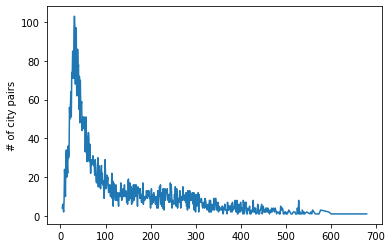

In [51]:
ax=poland['Distance'].round().value_counts().sort_index().plot()
ax.set_ylabel('# of city pairs')

Text(0, 0.5, '# of city pairs')

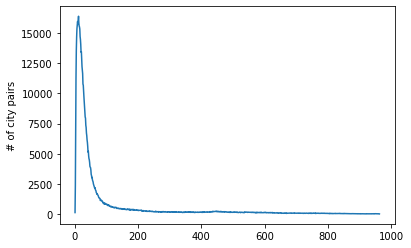

In [63]:
ax=france['Distance'].round().value_counts().sort_index().plot()
ax.set_ylabel('# of city pairs')

In [65]:
def gravity_model(x, a, b, d):
    return (x[0]**a + x[1]**b)/(x[2]**d)

def kernel(x, a, b, k):
    x1, x2 = x
    return k*((x1**(b))*(x2**a) + (x1**a)*(x2**(b)))

In [66]:
xdata = [france['SourcePopulation'].values, france['TargetPopulation'].values]
ydata = france['TravellerCount'].values
kernel_opt, kernel_cov = curve_fit(kernel, xdata, ydata)

xdata = [france['SourcePopulation'].values, france['TargetPopulation'].values, france['Distance'].values]
ydata = france['TravellerCount'].values
gravity_opt, gravity_cov = curve_fit(gravity_model, xdata, ydata)
pd.DataFrame([kernel_opt, gravity_opt], index=['Kernel', 'GravityModel'], columns=['a','b','d or r0']).round(2)

,a,b,d or r0
Kernel,0.42,0.15,0.06
GravityModel,0.54,0.70,1.14


In [70]:
xdata = [poland['SourcePopulation'].values, poland['TargetPopulation'].values]
ydata = poland['TravellerCount'].values
kernel_opt, kernel_cov = curve_fit(kernel, xdata, ydata,maxfev =10000)

xdata = [poland['SourcePopulation'].values, poland['TargetPopulation'].values, poland['Distance'].values]
ydata = poland['TravellerCount'].values
gravity_opt, gravity_cov = curve_fit(gravity_model, xdata, ydata, maxfev =10000)
pd.DataFrame([kernel_opt, gravity_opt], index=['Kernel', 'GravityModel'], columns=['a','b','d or r0']).round(2)

,a,b,d or r0
Kernel,0.91,0.93,0.00
GravityModel,-0.91,0.89,1.22
